<a href="https://colab.research.google.com/github/ajrianop/ML/blob/main/01_Train_TestSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**

Machine learning consists in the use and development of computer system, which by means algorithms allows to learn from observational data and it is possible to make predictions.<br>
We can find to types:
1. *Unsupervised learning:* is when you don't need to give any answer to the model, i.e. you don't describe or classify the data which the model have to study.<br>
An example can be related to clustering some data that has similar description and it could be classified.<br>
2. *Supervised learning:* is the case when your data give some answer about the question you want to study, it could be related to some relational data which in fact depicts the final information as the price of a house having into account some features as the number of rooms, bathrooms, living rooms, kitchens, ... In general in this case we use a train model for making predictions.<br>
In this we are going to use training set and test set, to create the best model to see if the test set fit well, to observe this, it is necessary to consider some measures or scores in order to see the accuracy of our model.

For ***supervised learning*** we can use the train/test method to describe the model properly, to do this the data set for train must be selected randomly, and this method is one of the best options to guard against overfitting.<br>
Not always this method is the best option, if our data is small, it could be not a good option, also we need to take care with the information to train our model, sometimes we could take some training set with has some bias, so we can think to solve this problem using other tools. One of this tools could be **K-fold cross validation**, which consists in split our data in several training set, which are described randomly.
The idea of K-fold cross validation:
* Split the data into K-randomly segments.
* Reserve one of the segments as the test set (by the K-1 steps).
* Train on each of the possible cases of the partition using those which are not the test set, measure the performance against the test set.
* Take the average of the K-1 $R^2$ scores. 

## **Train set and test set**

In [62]:
import numpy as np
# To call the polynomial regression model 
from pylab import *
# To plot
import matplotlib.pyplot as plt
# To use R2 score
from sklearn.metrics import r2_score

We are going to describe an example of the train/test sets in order to apply an supervised learning method.<br>
So we are going to consider data using random method to select values:

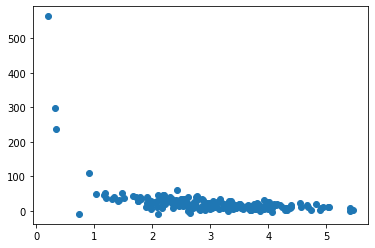

In [17]:
np.random.seed(9)
# Random data 
speeds = np.random.normal(3.0, 1.0, 200)
purchase = np.random.normal(50.0, 30.0, 200) / speeds


scatter(speeds, purchase)

Due to our information is random, we are going to split the dataset $80\%$ training set - $20\%$ test set in order to create our model. We can avoid overfitting using this splitting.

In [18]:
# X split
trainX=speeds[:160]
testX=speeds[160:]
# Y split
trainY=purchase[:160]
testY=purchase[160:]

So, the training plotting will be given as:

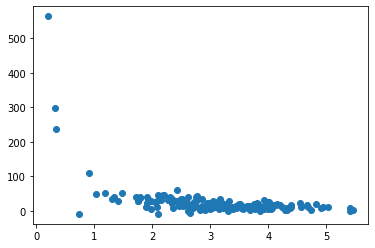

In [19]:
scatter(trainX,trainY)

The test plotting will be given as:

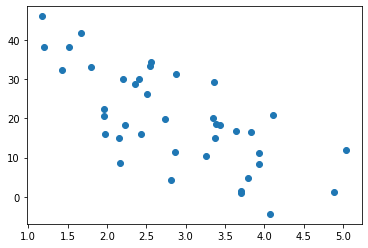

In [22]:
scatter(testX,testY)

Now, we are going to describe the model using a polynomial regression with different degrees, and we are going to see the $R^2$ associated to our test data.

In [95]:
# Building the polynomial model with degree n

def plotPolModel(trainX,trainY,testX,testY,n):
  '''
  Creating a polynomial regression of degree n
  '''
  #Subplot
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4))
  # Training plot
  xArr = np.array(trainX)
  yArr = np.array(trainY)
  # Model
  polyModel = np.poly1d(np.polyfit(xArr, yArr, n))
  # R2
  r2Train = r2_score(yArr,polyModel(xArr))
  # plot
  partition = np.linspace(0, 6, 100)
  #axes = plt.axes()
  ax1.set_xlim([0,7])
  ax1.set_ylim([0, 200])
  ax1.scatter(xArr,yArr)
  ax1.plot(partition, polyModel(partition), color='red')
  ax1.set_title('Training polynomial regression of degree '+str(n)+'\nwith R2: '+ str(r2Train))
  #ax1.show()
  # Test plot
  xArrTest = np.array(testX)
  yArrTest = np.array(testY)
  # R2
  r2Test = r2_score(yArrTest,polyModel(xArrTest))
  # plot
  partition = np.linspace(0, 6, 100)
  #axes = plt.axes()
  ax2.set_xlim([0,7])
  ax2.set_ylim([0, 200])
  ax2.scatter(xArrTest,yArrTest,color='green')
  ax2.plot(partition, polyModel(partition), color='red')
  ax2.set_title('Test polynomial regression of degree '+str(n)+'\nwith R2: '+ str(r2Test))
  plt.show()

Plotting of the polynomial regression of degree 4

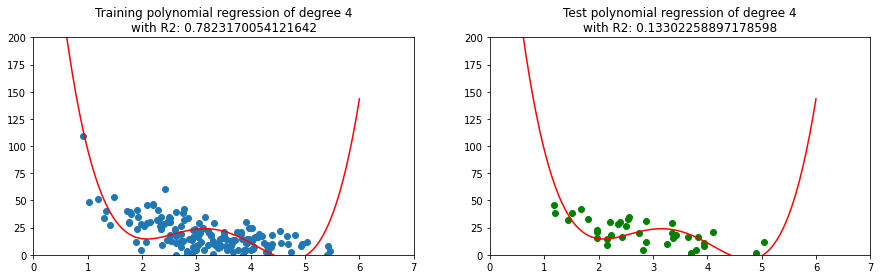

In [96]:
plotPolModel(trainX,trainY,testX,testY,4)

The model does not look that bad, but if we see the $R^2,$ we can see that the test data does not fit well, in fact the value of 0.13302258897178598 is terrible.

Let us compare the $R^2$ from several polynomial regression:


 --------------------------------------
Polynomial regression of degree 5



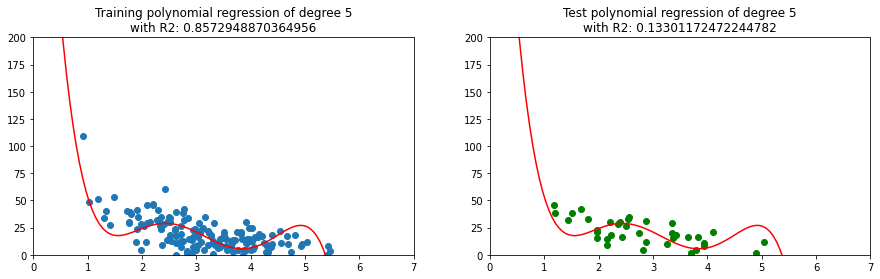


 --------------------------------------
Polynomial regression of degree 6



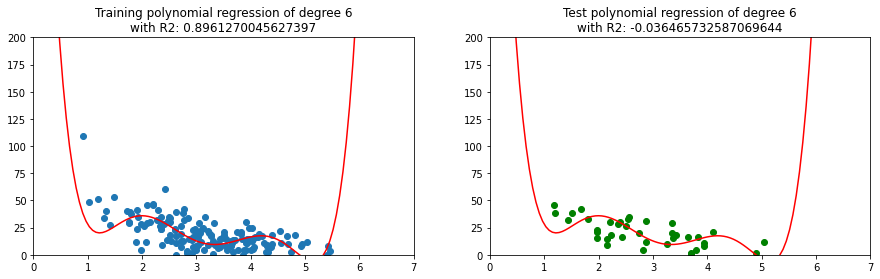


 --------------------------------------
Polynomial regression of degree 7



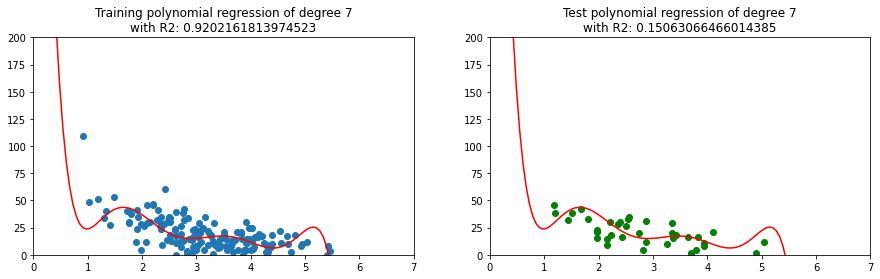


 --------------------------------------
Polynomial regression of degree 8



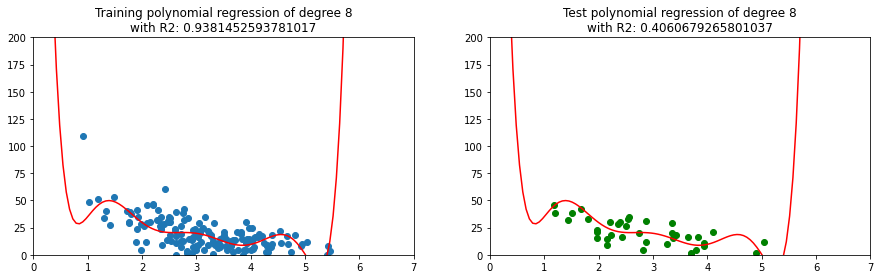


 --------------------------------------
Polynomial regression of degree 9



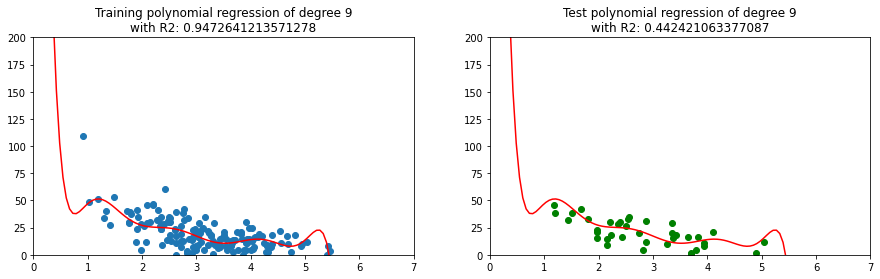


 --------------------------------------
Polynomial regression of degree 10



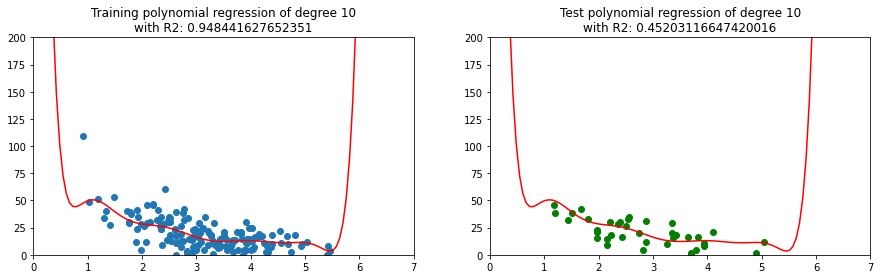


 --------------------------------------
Polynomial regression of degree 11



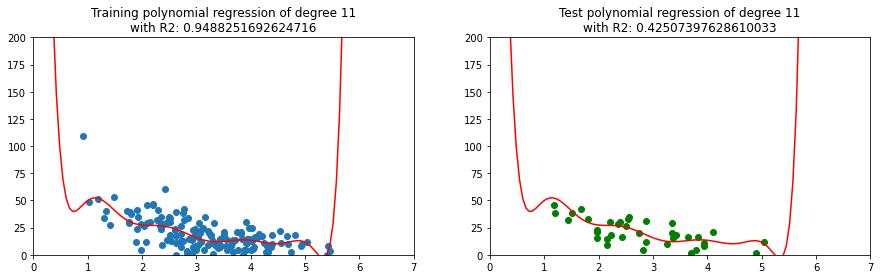


 --------------------------------------
Polynomial regression of degree 12



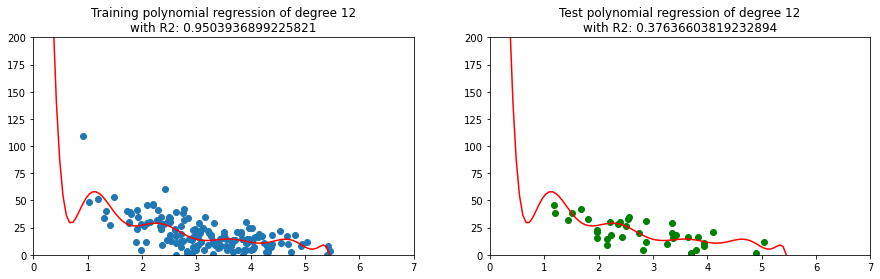


 --------------------------------------
Polynomial regression of degree 13



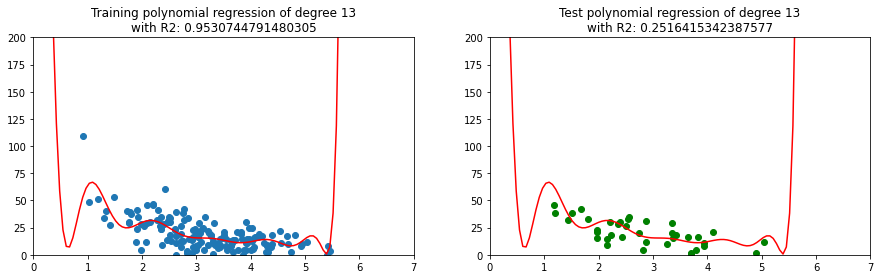


 --------------------------------------
Polynomial regression of degree 14



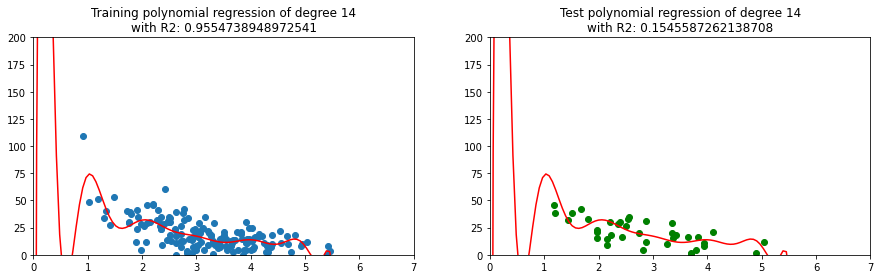

In [102]:
for n in range(5,15):
  print('\n --------------------------------------')
  print('Polynomial regression of degree '+ str(n)+'\n')
  plotPolModel(trainX,trainY,testX,testY,n)

We can look that the value of the $R^2$ for the training set improve when the degree is even greater. For the test set, the model fit well until certain values, we can see that after the 10 degree of the polynomial regression, the $R^2$ decrease, so, after this degree our models does not fit good enough.